# NAIVE BAYES with different Vectorization Techniques on Donar Choose Dataset

# 1. Initialising Environment

## 1.1 Importing Libraries 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# regular expressions: https://regex101.com/
import pickle
from tqdm import tqdm
import os

!pip install chart_studio
from chart_studio import plotly
import plotly.graph_objs as go
from collections import Counter

You should consider upgrading via the '/Users/ananthuraj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## 1.2 Loading Data

In [4]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv', nrows=50000)
resource_data = pd.read_csv('resources.csv',nrows=50000)

y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
data.shape

(50000, 9)

# 2. Preliminary Exploratory Data Analysis

Number of projects thar are approved for funding  41993 , ( 83.986 %)
Number of projects thar are not approved for funding  8007 , ( 16.014 %)


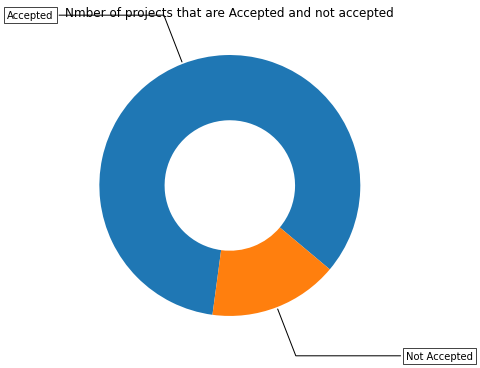

In [5]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

d = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(d, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

# 3. Data Preparation

<h2>3.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)

(33500, 8) (33500,)
(16500, 8) (16500,)


<h2>Encoding Essay and project_title</h2>

<h2> 3.2 Encoding Textual Features using BAG OF WORDS</h3>

In [15]:

# encoding essay attribute using count vectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_feature_bow=vectorizer.get_feature_names()
X_train_essay_bow=vectorizer.transform(X_train['essay'].values)
X_test_essay_bow=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_bow.shape,y_train.shape)
print("test feature --",X_test_essay_bow.shape,y_test.shape)
# print('the features are : ',essay_feature_bow)
print('--'*50)

# encoding school_state using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_bow=vectorizer.get_feature_names()
X_train_school_state_bow=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_bow=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_bow.shape,y_train.shape)
print("test feature --",X_test_school_state_bow.shape,y_test.shape)
print('the features are : ',school_state_feature_bow)
print('--'*50)

#encoding teacher_prefix using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_bow=vectorizer.get_feature_names()
X_train_teacher_prefix_bow=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_bow=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_bow.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_bow.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_bow)
print('--'*50)

#encoding project_grade_category using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_bow=vectorizer.get_feature_names()
X_train_project_grade_category_bow=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_bow=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_bow.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_bow.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_bow)
print('--'*50)

#encoding clean_categories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_bow=vectorizer.get_feature_names()
X_train_clean_categories_bow=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_bow=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_categories_bow.shape,y_test.shape)
print('the features are : ',clean_categories_feature_bow)
print('--'*50)

#encoding clean_subcategories using count vectorizer
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_bow=vectorizer.get_feature_names()
X_train_clean_subcategories_bow=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_bow=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_bow.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_bow.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_bow)
print('--'*50)




 after encoding in bow the size of :
 train feature -- (33500, 5000) (33500,)
test feature -- (16500, 5000) (16500,)
----------------------------------------------------------------------------------------------------
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
----------------------------------------------------------------------------------------------------
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
-------------------------------------------------------------------------

<h2>3.3 Encoding Text features using TFIDF </h2>

In [16]:
%time
# encoding essay attribute using count vectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
essay_feature_TF=vectorizer.get_feature_names()
X_train_essay_TF=vectorizer.transform(X_train['essay'].values)
X_test_essay_TF=vectorizer.transform(X_test['essay'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_essay_TF.shape,y_train.shape)
print("test feature --",X_test_essay_TF.shape,y_test.shape)
# print('the features are : ',essay_feature_bow)
print('--'*50)

# encoding school_state using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values)
school_state_feature_TF=vectorizer.get_feature_names()
X_train_school_state_TF=vectorizer.transform(X_train['school_state'].values)
X_test_school_state_TF=vectorizer.transform(X_test['school_state'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_school_state_TF.shape,y_train.shape)
print("test feature --",X_test_school_state_TF.shape,y_test.shape)
print('the features are : ',school_state_feature_TF)
print('--'*50)

#encoding teacher_prefix using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
teacher_prefix_feature_TF=vectorizer.get_feature_names()
X_train_teacher_prefix_TF=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_TF=vectorizer.transform(X_test['teacher_prefix'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_teacher_prefix_TF.shape,y_train.shape)
print("test feature --",X_test_teacher_prefix_TF.shape,y_test.shape)
print('the features are : ',teacher_prefix_feature_TF)
print('--'*50)

#encoding project_grade_category using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_category_feature_TF=vectorizer.get_feature_names()
X_train_project_grade_category_TF=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_TF=vectorizer.transform(X_test['project_grade_category'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_project_grade_category_TF.shape,y_train.shape)
print("test feature --",X_test_project_grade_category_TF.shape,y_test.shape)
print('the features are : ',project_grade_category_feature_TF)
print('--'*50)

#encoding clean_categories using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
clean_categories_feature_TF=vectorizer.get_feature_names()
X_train_clean_categories_TF=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_TF=vectorizer.transform(X_test['clean_categories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_categories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_categories_TF.shape,y_test.shape)
print('the features are : ',clean_categories_feature_TF)
print('--'*50)

#encoding clean_subcategories using count vectorizer
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
clean_subcategories_feature_TF=vectorizer.get_feature_names()
X_train_clean_subcategories_TF=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_TF=vectorizer.transform(X_test['clean_subcategories'].values)

print(" after encoding in bow the size of :")
print(" train feature --",X_train_clean_subcategories_TF.shape,y_train.shape)
print("test feature --",X_test_clean_subcategories_TF.shape,y_test.shape)
print('the features are : ',clean_subcategories_feature_TF)
print('--'*50)


CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 42 µs
 after encoding in bow the size of :
 train feature -- (33500, 5000) (33500,)
test feature -- (16500, 5000) (16500,)
----------------------------------------------------------------------------------------------------
 after encoding in bow the size of :
 train feature -- (33500, 51) (33500,)
test feature -- (16500, 51) (16500,)
the features are :  ['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
----------------------------------------------------------------------------------------------------
 after encoding in bow the size of :
 train feature -- (33500, 5) (33500,)
test feature -- (16500, 5) (16500,)
the features are :  ['dr', 'mr', 'mrs', 'ms', 'teacher']
-----------

<h2>Encoding Numerical and categorical features</h2>

## 3.4 Normalization of Numerical features

In [17]:
%time
# Encoding of categorical features are already done using bow and tfidf in the previous sections
# Applying Normalization on the numerical features using Normalizer().
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm=normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_price_norm.shape,y_train.shape)
print("test feature --",X_test_price_norm.shape,y_test.shape)
print('--'*50)


normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(" after encoding using normalizer the size of :")
print(" train feature --",X_train_teacher_number_of_previously_posted_projects_norm.shape,y_train.shape)
print("test feature --",X_test_teacher_number_of_previously_posted_projects_norm.shape,y_test.shape)
print('--'*50)



CPU times: user 31 µs, sys: 83 µs, total: 114 µs
Wall time: 1.18 ms
 after encoding using normalizer the size of :
 train feature -- (33500, 1) (33500,)
test feature -- (16500, 1) (16500,)
----------------------------------------------------------------------------------------------------
 after encoding using normalizer the size of :
 train feature -- (33500, 1) (33500,)
test feature -- (16500, 1) (16500,)
----------------------------------------------------------------------------------------------------


## 3.5 Final Data Preparation- merging all the vectorized features

In [18]:
%time
# Merging two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_BOW = hstack((X_train_essay_bow, X_train_school_state_bow, X_train_teacher_prefix_bow, X_train_project_grade_category_bow,X_train_clean_categories_bow,X_train_clean_subcategories_bow, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_BOW = hstack((X_test_essay_bow, X_test_school_state_bow, X_test_teacher_prefix_bow, X_test_project_grade_category_bow,X_test_clean_categories_bow,X_test_clean_subcategories_bow, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_BOW.shape, y_train.shape)
print(X_test_BOW.shape, y_test.shape)
print('--'*50)

X_train_TFIDF = hstack((X_train_essay_TF, X_train_school_state_TF, X_train_teacher_prefix_TF, X_train_project_grade_category_TF,X_train_clean_categories_TF,X_train_clean_subcategories_TF, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_test_TFIDF = hstack((X_test_essay_TF, X_test_school_state_TF, X_test_teacher_prefix_TF, X_test_project_grade_category_TF,X_test_clean_categories_TF,X_test_clean_subcategories_TF, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print(X_train_TFIDF.shape, y_train.shape)
print(X_test_TFIDF.shape, y_test.shape)
print('--'*50)

CPU times: user 8 µs, sys: 20 µs, total: 28 µs
Wall time: 60.1 µs
(33500, 5101) (33500,)
(16500, 5101) (16500,)
----------------------------------------------------------------------------------------------------
(33500, 5101) (33500,)
(16500, 5101) (16500,)
----------------------------------------------------------------------------------------------------


<h2>Appling NB on different kind of featurization</h2>


## Training    

### Hyper-parameter tuning on BOW features

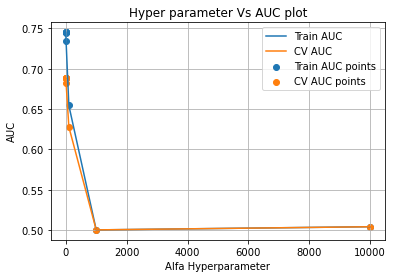

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.229401,0.457963,0.120459,0.056347,0.0001,{'alpha': 0.0001},0.688148,0.691831,0.688749,0.686867,...,0.688631,0.001718,4,0.747240,0.746003,0.747498,0.741891,0.743982,0.745323,0.002119
1,0.280867,0.044484,0.030006,0.017544,0.001,{'alpha': 0.001},0.688270,0.691830,0.688748,0.686866,...,0.688732,0.001668,3,0.747236,0.746003,0.747496,0.741890,0.743980,0.745321,0.002118
2,0.251388,0.033120,0.025678,0.009830,0.01,{'alpha': 0.01},0.688379,0.691826,0.688746,0.686860,...,0.688769,0.001654,1,0.747221,0.745996,0.747481,0.741880,0.743966,0.745309,0.002117
3,0.181589,0.021089,0.022867,0.004440,0.1,{'alpha': 0.1},0.688413,0.691755,0.688704,0.686815,...,0.688732,0.001642,2,0.747116,0.745898,0.747339,0.741776,0.743848,0.745195,0.002111
4,0.200190,0.021975,0.023863,0.007331,1,{'alpha': 1},0.687901,0.691080,0.688300,0.686369,...,0.688224,0.001567,5,0.746152,0.744913,0.745939,0.740753,0.742860,0.744123,0.002049
5,0.360212,0.053201,0.044199,0.012592,10,{'alpha': 10},0.681530,0.684494,0.682292,0.681153,...,0.682339,0.001159,6,0.736533,0.735007,0.733992,0.730672,0.733055,0.733852,0.001964
6,0.262394,0.039034,0.027573,0.007877,100,{'alpha': 100},0.622097,0.633491,0.621592,0.630649,...,0.627988,0.005098,7,0.657613,0.653481,0.655708,0.652126,0.653881,0.654562,0.001907
7,0.222007,0.066262,0.022006,0.004958,1000,{'alpha': 1000},0.500111,0.499844,0.500377,0.500200,...,0.500240,0.000274,9,0.500227,0.500294,0.500172,0.500139,0.500177,0.500202,0.000054
8,0.285559,0.062807,0.027232,0.008775,10000,{'alpha': 10000},0.503405,0.503651,0.504696,0.504976,...,0.504145,0.000602,8,0.504420,0.504386,0.504097,0.503827,0.504133,0.504173,0.000216


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model = MultinomialNB()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}   # Values of hyperparameter
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train_BOW, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# referred from: https://stackoverflow.com/a/48803361/4084039

plt.plot(K, cv_auc, label='CV AUC')
# referred from: https://stackoverflow.com/a/48803361/4084039

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alfa Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results



In [20]:
print(clf.best_estimator_)
best_alpha_bow = clf.best_estimator_.alpha
print('the best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :- ',best_alpha_bow)

MultinomialNB(alpha=0.01)
the best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :-  0.01


#### Hyper parameter tuning on TFIDF features

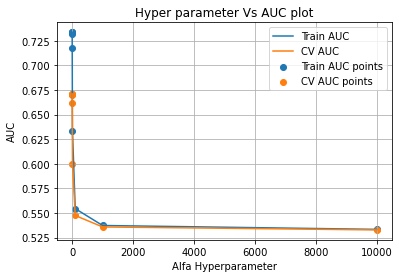

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.076264,0.423469,0.034390,0.002933,0.0001,{'alpha': 0.0001},0.668124,0.678073,0.663701,0.665995,...,0.671005,0.006368,1,0.734893,0.735051,0.734756,0.730712,0.732507,0.733584,0.001712
1,0.182740,0.036085,0.023420,0.004442,0.001,{'alpha': 0.001},0.668118,0.678058,0.663699,0.665988,...,0.670997,0.006364,2,0.734880,0.735037,0.734738,0.730698,0.732493,0.733569,0.001711
2,0.176593,0.023774,0.019729,0.003136,0.01,{'alpha': 0.01},0.668012,0.677937,0.663695,0.665903,...,0.670919,0.006342,3,0.734741,0.734898,0.734567,0.730559,0.732352,0.733423,0.001707
3,0.181291,0.025414,0.020630,0.004368,0.1,{'alpha': 0.1},0.667203,0.676800,0.663527,0.665012,...,0.670230,0.006239,4,0.733373,0.733504,0.732856,0.729149,0.730924,0.731961,0.001683
4,0.159065,0.008577,0.018865,0.002466,1,{'alpha': 1},0.657621,0.665196,0.657049,0.656033,...,0.661254,0.005600,5,0.719898,0.719827,0.716668,0.715376,0.716993,0.717752,0.001806
5,0.202735,0.030441,0.022148,0.005394,10,{'alpha': 10},0.596496,0.592915,0.602355,0.596483,...,0.599945,0.006512,6,0.636071,0.634276,0.631604,0.632053,0.631273,0.633055,0.001837
6,0.180481,0.022079,0.020122,0.002235,100,{'alpha': 100},0.550416,0.534776,0.552635,0.544478,...,0.547473,0.007253,7,0.554358,0.556447,0.553863,0.555007,0.552486,0.554432,0.001304
7,0.142626,0.012959,0.014950,0.004541,1000,{'alpha': 1000},0.542256,0.520160,0.535974,0.535054,...,0.535816,0.008759,8,0.535749,0.540769,0.537659,0.537537,0.534792,0.537301,0.002045
8,0.154173,0.018085,0.013201,0.002190,10000,{'alpha': 10000},0.541168,0.513481,0.532994,0.531169,...,0.532802,0.010951,9,0.531222,0.538023,0.533504,0.533832,0.530218,0.533360,0.002699


In [21]:
model = MultinomialNB()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]}
clf = GridSearchCV(model, parameters, cv=5, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train_TFIDF, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# Reference: https://stackoverflow.com/a/48803361/4084039

plt.plot(K, cv_auc, label='CV AUC')
# Reference: https://stackoverflow.com/a/48803361/4084039

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alfa Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results


In [22]:
print(clf.best_estimator_)
best_alpha_tfidf = clf.best_estimator_.alpha
print('the best value of hyper-parameter alpha by Gridsearch on TFIDF Vectorization is :- ',best_alpha_tfidf)

MultinomialNB(alpha=0.0001)
the best value of hyper-parameter alpha by Gridsearch on TFIDF Vectorization is :-  0.0001


## Testing 

In [23]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

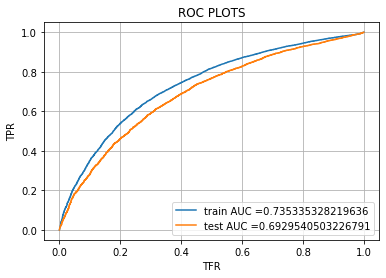

In [24]:
from sklearn.metrics import roc_curve, auc

model = MultinomialNB(alpha=best_alpha_bow)
model.fit(X_train_BOW, y_train)

y_train_pred_BOW = batch_predict(model, X_train_BOW)    
y_test_pred_BOW = batch_predict(model, X_test_BOW)

train_fpr_BOW, train_tpr_BOW, train_thresholds_BOW = roc_curve(y_train, y_train_pred_BOW)
test_fpr_BOW, test_tpr_BOW, test_thresholds_BOW = roc_curve(y_test, y_test_pred_BOW)

plt.plot(train_fpr_BOW, train_tpr_BOW, label="train AUC ="+str(auc(train_fpr_BOW, train_tpr_BOW)))
plt.plot(test_fpr_BOW, test_tpr_BOW, label="test AUC ="+str(auc(test_fpr_BOW, test_tpr_BOW)))
AUC_BOW=auc(test_fpr_BOW, test_tpr_BOW)
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

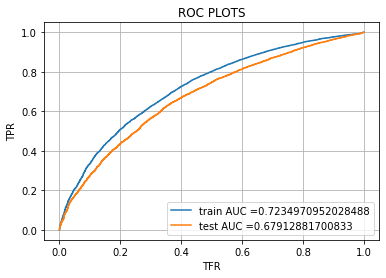

In [25]:
from sklearn.metrics import roc_curve, auc

model = MultinomialNB(alpha=best_alpha_tfidf)
model.fit(X_train_TFIDF, y_train)

y_train_pred_TFIDF = batch_predict(model, X_train_TFIDF)    
y_test_pred_TFIDF = batch_predict(model, X_test_TFIDF)

train_fpr_TFIDF, train_tpr_TFIDF, train_thresholds_TFIDF = roc_curve(y_train, y_train_pred_TFIDF)
test_fpr_TFIDF, test_tpr_TFIDF, test_thresholds_TFIDF = roc_curve(y_test, y_test_pred_TFIDF)

plt.plot(train_fpr_TFIDF, train_tpr_TFIDF, label="train AUC ="+str(auc(train_fpr_TFIDF, train_tpr_TFIDF)))
plt.plot(test_fpr_TFIDF, test_tpr_TFIDF, label="test AUC ="+str(auc(test_fpr_TFIDF, test_tpr_TFIDF)))
AUC_TFIDF=auc(test_fpr_TFIDF, test_tpr_TFIDF)     
plt.legend()
plt.xlabel("TFR")
plt.ylabel("TPR")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

In [26]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [27]:
def plot_CF_MAT(X):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import pandas as pd
    
    df = pd.DataFrame(X, index = [0,1],columns = [0,1])
    print(df)
    print('\n')
    sns.cubehelix_palette(8)
    sns.set(font_scale=1.5)
    df.index.name = 'Actual'
    df.columns.name = 'Predicted'
    labels =  np.array([[{'TN':X[0][0]},{'FP':X[0][1]}],[{'FN':X[1][0]},{'TP':X[1][1]}]])
    fig, ax = plt.subplots()
    ax = sns.heatmap(df, annot = labels,fmt='',annot_kws={"size": 16},cbar=False,linecolor='white',linewidths=.75,cmap="PuBu")
    plt.show()


 The confusion matrix of model with BOW vectorization
------------------------------------------------------------
      0     1
0  1653   989
1  4664  9194




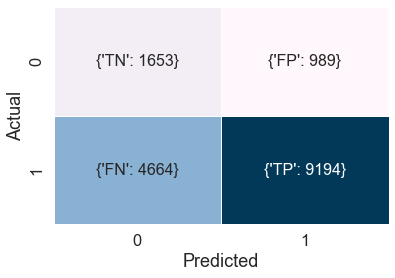

----------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------- 


 The confusion matrix of model with TFIDF vectorization
      0     1
0  1551  1091
1  4441  9417




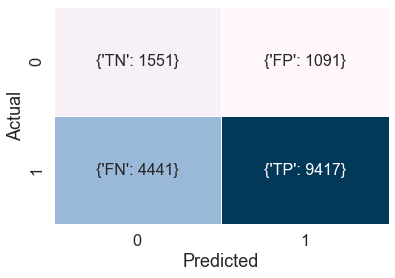

In [30]:

print (" The confusion matrix of model with BOW vectorization")
print("--"*30)
best_t = find_best_threshold(train_thresholds_BOW, train_fpr_BOW, train_tpr_BOW)
CF_MAT_BOW=confusion_matrix(y_test, predict_with_best_t(y_test_pred_BOW, best_t))
plot_CF_MAT(CF_MAT_BOW)

print("--"*50)
print("--"*50,"\n\n")


print (" The confusion matrix of model with TFIDF vectorization")
print("=="*30)
best_t = find_best_threshold(train_thresholds_TFIDF, train_fpr_TFIDF, train_tpr_TFIDF)
CF_MAT_TFIDF=confusion_matrix(y_test, predict_with_best_t(y_test_pred_TFIDF, best_t))
plot_CF_MAT(CF_MAT_TFIDF)



In [35]:
def extract_feature_names(n,d,f1,f2,f3,f4,f5,f6,prob_val):
    print('The top ',n,' features are --')
    print('--'*50)
    for i in range(n):
        if d[i] < 5000:
            print(i+1 ,": feature belongs to the ESSAY feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f1[d[i]])
        elif d[i] >= 5000 and d[i]<5051:
            print(i+1 ,": feature belongs to the SCHOOL_STATE feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f2[d[i]-5000])
        elif d[i] >= 5051 and d[i]<5056:
            print(i+1 ,": feature belongs to the TEACHER_PREFIX feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f3[d[i]-5051])
        elif d[i] >= 5056 and d[i]<5060:
            print(i+1 ,": feature belongs to the PROJECT_GRADE_CATEGORY feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f4[d[i]-5056])
        elif d[i] >= 5060 and d[i]<5069:
            print(i+1 ,": feature belongs to the CLEAN_CATEGORIES feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f5[d[i]-5060])
        elif d[i] >= 5069 and d[i]<5099:
            print(i+1 ,": feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with",prob_val[d[i]],'probability, and the feature name after_vectorising is,',f6[d[i]-5069])
        elif d[i] == 5099:
            print(i+1 ,": feature belongs to the PRICE feature in the data with",prob_val[d[i]],'probability ')
        else:
            print(i+1 ,": feature belongs to the PRICE feature in the data with",prob_val[d[i]],'probability ')
        
    print('--'*50)

In [36]:
# Referred from : (https://stackoverflow.com/questions/36265930/how-to-sort-in-descending-order-with-numpy)
from numpy import argsort
prob_val = abs(model.feature_log_prob_[1]) # Probabilities corresponding to the class label 1
feature_index=np.argsort(-prob_val)  # -prob_val for the descending order
extract_feature_names(20,feature_index,essay_feature_TF,school_state_feature_TF,teacher_prefix_feature_TF,project_grade_category_feature_TF,clean_categories_feature_TF,clean_subcategories_feature_TF,prob_val)


The top  20  features are --
----------------------------------------------------------------------------------------------------
1 : feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with 13.464070642918989 probability, and the feature name after_vectorising is, warmth
2 : feature belongs to the CLEAN_SUB_CATEGORIES feature in the data with 13.464070642918989 probability, and the feature name after_vectorising is, care_hunger
3 : feature belongs to the CLEAN_CATEGORIES feature in the data with 13.460815389124331 probability, and the feature name after_vectorising is, care_hunger
4 : feature belongs to the CLEAN_CATEGORIES feature in the data with 13.460815389124331 probability, and the feature name after_vectorising is, warmth
5 : feature belongs to the TEACHER_PREFIX feature in the data with 11.998758637524721 probability, and the feature name after_vectorising is, dr
6 : feature belongs to the ESSAY feature in the data with 10.724476804325164 probability, and the featu

<h1>3. Summary</h1>


In [37]:
from prettytable import PrettyTable

x = PrettyTable(["Vectorization","Model", "Hyper-parameter tuning", "Hyper-parameter" ,"AUC_SCORE"])
x.add_row([" BOW ", "MultinomialNB","GridSearchCV", best_alpha_bow, AUC_BOW])
x.add_row([" TFIDF ","MultinomialNB", "GridSearchCV", best_alpha_tfidf, AUC_TFIDF])
print(x)

+---------------+---------------+------------------------+-----------------+--------------------+
| Vectorization |     Model     | Hyper-parameter tuning | Hyper-parameter |     AUC_SCORE      |
+---------------+---------------+------------------------+-----------------+--------------------+
|      BOW      | MultinomialNB |      GridSearchCV      |       0.01      | 0.6929540503226791 |
|     TFIDF     | MultinomialNB |      GridSearchCV      |      0.0001     |  0.67912881700833  |
+---------------+---------------+------------------------+-----------------+--------------------+
